# Wstęp


W ciągu najbliższych zajęć zapoznamy się z podstawowymi konceptami statystyki opisowej i matematycznej oraz ich implementacjami w Pythonie. Ponieważ zajęcia skupione będą na praktycznych rozważaniach, do zgłębienia teorii polecam:

- Ostasiewicz, Rusnak, Siedlecka - *Statystyka. Elementy teorii i zadania*
- Diez, CetinKaya-Rundel (english) - [*OpenIntro Statistics*](https://www.openintro.org/book/stat/)
- Downey (english) - [*Think Stats*](http://greenteapress.com/thinkstats/)

# Dane

Dane z którymi będziemy pracować pochodzą z https://archive.ics.uci.edu/ml/datasets/Bank+Marketing, wzbogacone o własne modyfikacje (dodany podział na grupę kontrolną/testową, modyfikacje zmiennej celu)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank_data_prediction_task.csv to bank_data_prediction_task.csv


In [ ]:
import pandas as pd

bank_data = pd.read_csv('bank_data_prediction_task.csv', sep=",")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
bank_data.drop("Unnamed: 0", axis=1,inplace=True)

In [ ]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,test_control_flag
1,56,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,campaign group
3,25,services,single,high.school,no,yes,no,telephone,may,mon,50.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
4,25,services,single,high.school,no,yes,no,telephone,may,mon,222.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group
5,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,146.0,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,campaign group


Przed przystąpieniem do analizy rozważmy:
- jak "powstały" dane
- co było/jest populacją / próbką 
- jak chcemy generalizować model
- co jest zmienną zależną, niezależnymi
- ...

# Podstawowe zrozumienie danych - rozkłady empiryczne

Punktem wyjścia do opisu naszych zmiennych losowych mogą być histogramy, lub wykresy liczności - przybliżają one rozkłady naszych zmiennych.

## Spójrzmy na histogramy kilku zmiennych

### Zmienne dyskretne

Funkcja masy prawdopdobieństwa - empiryczna

#### y

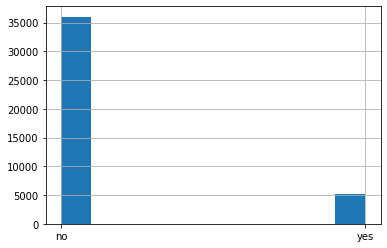

In [ ]:
bank_data.y.hist()

In [ ]:
import plotly.express as px

fig = px.histogram(bank_data, x="y", histnorm='probability density')
fig.show()

#### martial

Proszę analogicznie przygotować wykresy dla zmiennej "martial"

In [ ]:
fig = px.histogram(bank_data, x="job", histnorm='probability density')
fig.show()

### Zmienne ciągłe

#### wiek

Funkcja gęstości prawdopodobieństwa - empiryczna

In [ ]:
fig = px.histogram(bank_data, x="age")
fig.show()

In [ ]:
fig = px.histogram(bank_data, x="age", histnorm='probability density')
fig.show()

Dystrybuanta - empiryczna

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
import plotly.graph_objects as go
import numpy as np

def result(v):
  return np.searchsorted(x, v, side='right') / x.size
  return result

fig = go.Figure()
fig.add_scatter(x=np.unique(bank_data["age"]), y=ECDF(bank_data["age"])(np.unique(bank_data["age"])), line_shape='hv')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



#### duration

Proszę narysować histogramy z różną liczbą przedziałów (parametr nbins np. 10, 50, 100, 500) 

In [ ]:
fig = px.histogram(bank_data, x="duration", histnorm='probability density')
fig.show()

# Numeryczny opis rozkładów

Same wykresy zazwyczaj nam niewystarczą - chcielibyśmy opisać nasze dane konkretnymi wartościami numerycznymi. Służą do tego miary rozkładu.

## Miary tendencji centralnej 

- średnia
- mediana
- moda

Dodatkowo warto brać pod uwagę inne miary położenia - kwantyle lub percentyle

Proszę policzyć podstawowe miary centralne dla zmiennej durtion

In [ ]:
bank_data["duration"].mean()

259.66017237193495

In [ ]:
bank_data["duration"].median()

180.0

In [ ]:
bank_data["duration"].mode()

0    85.0
1    96.0
dtype: float64

.Proszę policzyć wartość średniej bez obserwacji o najwyżej wartości

In [ ]:
bank_data.drop(bank_data["duration"].idxmax())["duration"].mean()

259.37742033383915

Proszę policzyc 1, 5, 10, 25, 50, 60, 75, 90, 95, 98, 99.5 percentyl zmiennej duration

In [ ]:
bank_data["duration"].quantile([0, 0.01, 0.05, 0.1, 0.25, 0.5, 0.6, 0.75, 0.9, 0.95, 0.98, 0.995, 1])

0.000       0.00
0.010      11.00
0.050      36.00
0.100      59.00
0.250     103.00
0.500     180.00
0.600     222.00
0.750     321.00
0.900     557.50
0.950     748.00
0.980    1044.50
0.995    1513.25
1.000    4918.00
Name: duration, dtype: float64

## Miary zróżnicowania

Miary pozwalające nam lepiej zrozumieć jak rozproszona jest cecha.

- odchylenie standardowe
- Średnie odchylenie bezwzględne (MAD) (średnia z odchyleń od średniej)
- Współczynnik zmienności (odchylenie standardowe / średnia)
- Rozstęp (max - min)
- Rozstęp ćwiartkowy (ICQ) (Q3 - Q1)

Proszę policzyć powyższe miary zróżnicowania

In [ ]:
bank_data["duration"].std()

260.6526507441572

In [ ]:
bank_data["age"].std()

10.421249980934189

In [ ]:
bank_data["duration"].std()/bank_data["duration"].mean()

1.003852684814564

In [ ]:
bank_data["age"].std()/bank_data["age"].mean()

0.26037463154004875

## Miary skośności

Miary pozwalające ocenić symetrię rozkładu

- trzeci moment centralny
- Współczynnik asymetrii (trzeci moment / średnia)

Proszę policzyć powyższe miary zróżnicowania

In [ ]:
from scipy.stats import moment
moment(bank_data["duration"].dropna(), 3) / bank_data["duration"].dropna().mean()

226868.5246719528

In [ ]:
moment(bank_data["age"].dropna(), 3) / bank_data["age"].dropna().mean()

22.18750932086608

## Miary koncentracji

- kurtoza (czwarty moment centralny / odchylenie standardowe^4) - 3
- współczynnik Ginniego

Proszę policzyć kurtozę

In [ ]:
from scipy.stats import kurtosis

kurtosis(bank_data["duration"].dropna())

21.78454981417123

In [ ]:
kurtosis(bank_data["age"].dropna())

0.7910698035273871

# Rozkłady / miary warunkowe

W praktyce często intersują nas zależności jednych zmiennych od drugich. Jedną z metod ich badania jest przyglądanie się rozkładom warunkowym i ich statystykom opisowym.

## Porównanie histogramów

In [ ]:
px.histogram(bank_data, x="duration", color="y", barmode="overlay", histnorm='probability density')

## Wykres punktowy (scatter plot)

In [ ]:
fig = px.scatter(bank_data, x="duration", y="age")
fig.show()

In [ ]:
fig = px.scatter(bank_data, x="duration", y="age", color="y")
fig.show()

## Warunkowe statystyki opisowe

In [ ]:
bank_data.groupby("y").describe()

age                              ... nr.employed                        
       count       mean        std   min  ...         25%     50%     75%     max
y                                         ...                                    
no   36020.0  39.954137   9.925906  17.0  ...      5099.1  5195.8  5228.1  5228.1
yes   5168.0  40.511416  13.364545  17.0  ...      5017.5  5099.1  5195.8  5228.1

[2 rows x 80 columns]

In [ ]:
pd.crosstab(bank_data.job, bank_data.y, normalize='index')

y,no,yes
job,,
admin.,0.858664,0.141336
blue-collar,0.911714,0.088286
entrepreneur,0.905220,0.094780
housemaid,0.890566,0.109434
management,0.892613,0.107387
retired,0.743023,0.256977
self-employed,0.883181,0.116819
services,0.893172,0.106828
student,0.696000,0.304000


# Badanie korelacji

Correlation does not imply causation
https://www.tylervigen.com/spurious-correlations

Stopień powiązania pomiędzy zmiennymi pozwalają nam wyznaczyć miary korelacji. W zależności od typu zmiennych i rodzaju związku między nimi powinniśmy stosować różne miary.

## Współczynnik korelacji liniowej Pearsona

Do obliczania poziomu zależności liniowej między dwiema zmiennymi (X,Y) ciągłymi używamy współczynnika korelacji liniowej Pearsona. Przyjmuje on wartości z zakresu $[-1,1]$. 

$$ r_{xy} = \frac{\sum_{i=1}^{n}(x_i - \overline{X})(y_i - \overline{Y})}{\sqrt{\sum_{i=1}^{n}(x_i - \overline{X})^2(y_i - \overline{Y})^2}} $$

gdzie: $\overline{Y}, \overline{X}$ to średnie wartości zmiennych

Dodatnia wartość r mówi o tym, że wzrostowi jednej cechy odpowiada wzrost średnich wartości drugiej cechy. Wartość ujemna - wzrostowi wartości jednej cechy odpowiada spadek średnich wartości drugiej cechy. Wartość bezwzględna współczynnika korelacji Pearsona mówi o sile zależności. W pythonie można uzyskać macierz korelacji za pomocą ``np.corrcoef(x,y)``, a następnie wyciągnąć interesujący nas element macierzy. Alternatywą jest ``scipy.stats.pearsonr(x,y)`` i pierwszy element (czyli ten o indeksie zerowym) zwracanej krotki


In [ ]:
fig = px.scatter(bank_data, x="age", y="duration")
fig.show()

In [ ]:
bank_data = bank_data.dropna()

In [ ]:
np.corrcoef(bank_data.dropna()["age"],bank_data.dropna()["duration"])

array([[ 1.        , -0.00823385],
       [-0.00823385,  1.        ]])

## Korelacja rangowa Spearmana

Do opisu korelacji między dwiema cechami mierzalnymi w przypadku kiedy ich liczność jest mała, lub jakościowych jeśli można je uporządkować wykorzystuje się współczynnik korelacji rang Spearmana:

$$ r_s = 1 - \frac{6 \sum d^2}{n(n^2-1)}$$ gdzie:

$d$ to poszczególne różnice między rangami, a $n$ to liczba obserwacji

Pozwala też badać nieliniowe, monotoniczne zależności.

Czy istnieje zależność między wynikami w nauce X a zamożnością Y? Zebrano w tabeli dane o 7 studentach, nadając im odpowiednie rangi (kolejności). Obliczyć odpowiedni współczynnik korelacji i określić moc zależności.

|Student|	A|	B|	C|	D|	E|	F|	G|
|---|---|---|---|---|---|---|---|
|nauka X|	1|	4|	2|	6|	3|	7|	5|
|zamożność Y|	2|	7|	6|	1|	3|	5|	4|


In [ ]:
import numpy as np
from scipy.stats import spearmanr
x = np.array([1,4,2,6,3,7,5])
y = np.array([2,7,6,1,3,5,4])

In [ ]:
spearmanr(x,y)

SpearmanrResult(correlation=0.0, pvalue=1.0)

Proszę policzyć korelację między duration a wiekiem

In [ ]:
spearmanr(bank_data["duration"], bank_data["age"])

SpearmanrResult(correlation=-0.005686616642372139, pvalue=0.4654646277923631)

Proszę policzyć korelację między duration a poziomem edukacji

In [ ]:
edu_map = {"university.degree":6,
"high.school":5,
"basic.9y":3,
"professional.course":4,
"basic.4y":1,
"basic.6y":2,
"illiterate":0}

In [ ]:
bank_data = bank_data.dropna()

In [ ]:
bank_data = bank_data[bank_data["education"]!="unknown"]

In [ ]:
bank_data.loc[:,"education"] = bank_data["education"].map(edu_map)

In [ ]:
spearmanr(bank_data["education"], bank_data["age"])

SpearmanrResult(correlation=-0.16870143631846266, pvalue=3.9932139813528363e-101)

Proszę zwizualizować z pomoca scatter plot

In [ ]:
px.scatter(x=bank_data["education"], y = bank_data["duration"])

In [ ]:
px.box(x=bank_data["education"], y = bank_data["duration"])

## Współczynniki chi^2

<font color='blue'>**Zależność między cechami kategorialnymi**</font> W przypadku danych niemetrycznych potrzebujemy innych mierników zależności - współczynnik korelacji Pearsona nie ma tutaj zastosowania. W przypadku kiedy dane mamy w postaci tabeli kontyngencji:

|$i/j$|	$y_1$|	$y_2$|...|	$y_s$|	$\sum$|
|---|---|---|---|---|---|
|$x_1$|	$n_{11}$|		$n_{11}$|	...|	$n_{1s}$|	$n_{1\_}$|
|$x_2$|	$n_{21}$|		$n_{22}$|	...|	$n_{2s}$|	$n_{2\_}$|
|...|	... |	... |...	 |...	 |           ...|
|$x_r$|	$n_{r1}$|	$n_{r2}$|	...|	$n_{rs}$|	$n_{r\_}$|
|$\sum$|	$n_{\_1}$|	$n_{\_2}$|...|	$n_{\_s}$|$n$|

Możemy obliczać statystyki oparte na miarze $\chi^2$:

$$ \chi^2 = \sum_{i=1}^{r} \sum_{j=1}^{s} \frac{(n_{ij} - n_{ij}^{\prime})^2}{n_{ij}^{\prime}} $$

$$ n_{ij}^{\prime} = \frac{n_{i\_} * n_{\_j}}{n} $$

Współczynnik $\chi^2$na bazie tabeli kontyngencji można wyliczyć za pomocą ``scipy.stats.chi2_contingency``. Pierwszy element zwracanej krotki to interesująca nas wartość $\chi^2$

**Współczynnik Yule'a**
(dla tabel 2x2)

$$ \varphi = \sqrt{\frac{\chi^2}{n}} $$

**Współczynnik T-Czuprowa**

$$ T = \sqrt{\frac{\chi^2}{n\sqrt{(r-1)(s-1)}}} $$

**Współczynnik V-cramera**

$$ V = \sqrt{\frac{\chi^2}{n * min{(r-1)(s-1)}}} $$

Im większe wartości, tym wyższa zależność

Pewien element jest wytwarzany równolegle na trzech frezarkach. Zbadano dokładność wykonanych elementów i otrzymano następujące wyniki:

|norma|frezarka 1| frezarka 2|	frezarka 3|
| --- | --- | --- | --- |
|wyroby spełniające normę |	24|	18 |	12|
|wyroby nie spełniające normy|	10|	6|	8|

Czy dokładność wykonania zależy od maszyny?


Policzmy zależność między job a y

In [ ]:
pd.crosstab(bank_data["job"], bank_data["y"])

y,no,yes
job,,
admin.,3402,666
blue-collar,3088,437
entrepreneur,501,60
housemaid,377,50
management,983,111
retired,487,178
self-employed,486,73
services,1312,216
student,211,86


In [ ]:
import scipy
scipy.stats.chi2_contingency(pd.crosstab(bank_data["y"], bank_data["job"]))

(183.55839719928753,
 1.887451919561414e-33,
 11,
 array([[3460.68583734, 2998.75063339,  477.24797314,  363.25291361,
          930.6760831 ,  565.7217507 ,  475.54655435, 1299.8839625 ,
          252.66069166, 2206.74018242,  334.32879402,   65.50462376],
        [ 607.31416266,  526.24936661,   83.75202686,   63.74708639,
          163.3239169 ,   99.2782493 ,   83.45344565,  228.1160375 ,
           44.33930834,  387.25981758,   58.67120598,   11.49537624]]))

In [ ]:
bank_data.shape

(15788, 22)

In [ ]:
np.sqrt(183.55839719928753/15788)

0.1078260186194195

# Dodatkowe rozważania

## Dodatkowe dane

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving extra_data.csv to extra_data.csv


Proszę załadwoać dane, następnie policzyć podstawowe statystyki opisowe dla zmiennych x1, y1, x2, y2 oraz współczynnik korelacji Pearsona pomiędzy zmiennymi o tych samych numerach

In [ ]:
extra = pd.read_csv("extra_data.csv", sep=";", decimal=",")

In [ ]:
extra.head()

,x1,y1,x2,y2
0,32.331110,61.411101,55.3846,97.1795
1,53.421463,26.186880,51.5385,96.0256
2,63.920202,30.832194,46.1538,94.4872
3,70.289506,82.533649,42.8205,91.4103
4,34.118830,45.734551,40.7692,88.3333


In [ ]:
extra.describe()

,x1,y1,x2,y2
count,142.000000,142.000000,142.000000,142.000000
mean,54.266100,47.834721,54.263273,47.832253
std,16.769825,26.939743,16.765142,26.935403
min,15.560750,0.015119,22.307700,2.948700
25%,39.724115,24.625892,44.102600,25.288450
50%,53.340296,47.535269,53.333300,46.025600
75%,69.146597,71.803148,64.743600,68.525675
max,91.639961,97.475771,98.205100,99.487200


In [ ]:
extra.corr()

,x1,y1,x2,y2
x1,1.000000,-0.064128,-0.333159,0.000679
y1,-0.064128,1.000000,0.016166,0.055565
x2,-0.333159,0.016166,1.000000,-0.064472
y2,0.000679,0.055565,-0.064472,1.000000


In [ ]:
px.scatter(x=extra["x1"],y=extra["y1"])

In [ ]:
px.scatter(x=extra["x2"],y=extra["y2"])

## Profiler

In [ ]:
!pip install pandas_profiling --upgrade

     |████████████████████████████████| 245kB 5.3MB/s 
     |████████████████████████████████| 61kB 4.1MB/s 
     |████████████████████████████████| 3.2MB 7.1MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 1.1MB 23.7MB/s 
     |████████████████████████████████| 296kB 35.1MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=20de0b8b53466e1c8f577888c1e9b2809089097c7006e78821ca368151da2d4c
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=a8379befdb2d27ec31731278501032f513692f895539690c8eac696b31d3c537
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built htmlmin phik
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but yo

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(bank_data)

In [ ]:
profile

AttributeError: ignored

# Najważniejsze rozkłady

In [ ]:
import scipy

## Rozkład dwumianowy

Wiele razy niezależnie powtarzamy eksperyment, który może mieć tylko dwa wyniki: sukces lub porażka. Rozkład prawdopobieństwa opisujący liczbę sukcesów *k* wśród *n* eksperymentów, ze stałym prawdopobieństwem porażki *p* to rozkład dwumianowy (przyjmuje się też nazwę rozkład Bernouliego). Zmienną losową mającą taki rozkład oznaczamy jako $ X \tilde{}B(n,p) $.

Rozkład prawdopobieństwa:
$P(X=k)={n\choose k}p^k (1-p)^{(n-k)}$ - ``scipy.stats.binom.pmf(k, n, p)``

Dystrybuanta:
$P(X \leq k) = F(k)=\sum_{k \leq n}{n\choose k}p^k (1-p)^{(n-k)}$ - ``scipy.stats.binom.cdf(k, n, p)``

Wartość oczekiwana:
$E(X) = np$

Wariancja:
$V(X) = np(1-p)$

 -PDF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

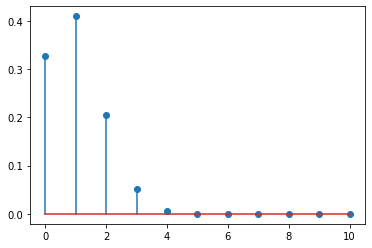

In [ ]:
from scipy.stats import binom
import matplotlib.pyplot as plt

num_trials = 5
heads_probability = .2

probs = [binom.pmf(i, num_trials, heads_probability) for i in range(11)]
plt.stem(list(range(11)), probs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


<StemContainer object of 3 artists>

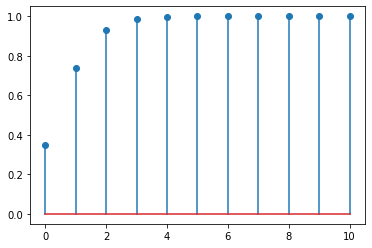

In [ ]:
num_trials = 10
heads_probability = .1

probs = [binom.cdf(i, num_trials, heads_probability) for i in range(11)]
plt.stem(list(range(11)), probs)

- 20 % studentów jest wysokich. Jakie jest prawdopodobieństwo, że wśród 5 wybranych losowo studentów jest


- 3 wysokich

In [ ]:
scipy.stats.binom.pmf(3, 5, 0.2)

0.051200000000000016

- nie więcej niż 2 wysokich

In [ ]:
scipy.stats.binom.cdf(2, 5, 0.2)

0.94208

- oblicz oczekiwaną liczbę wysokich studentów oraz odchylenie standardowe

In [ ]:
0.2*5

1.0

In [ ]:
5*0.2*0.8

0.8

Wyobraźmy sobie, że na naszej stronie internetowej mamy baner, CTR z którego do tej pory wynosiło 6%. Od jakiegoś czasu wprowadziśmy jego nową testową wersję, którą pokazaliśmy 750 osób. 34 z nich dokonało zakupu. Czy powinniśmy wdrożyć nową wersję baneru? 

In [ ]:
34/750

0.04533333333333334

In [ ]:
scipy.stats.binom.cdf(50, 1000, 0.06)

0.10056759171163647

## Rozkład Poissona

Rozkład Poissona jest rozkładem dyskretnym. Opisuje prawdopobieństwo wystąpienia niezależnych, następujących po sobie zdarzeń w danym czasie. Parametrem rozkładu jest częstotliwość $\lambda$ - ilość zdarzeń w jednostce czasu. Zmienną losową mającą taki rozkład opisujemy $X \tilde{} Poiss(\lambda)$

Rozkład prawdopobieństwa: $ P(X=k) = \frac{\lambda^ke^{-\lambda}}{k!} $ ``scipy.stats.poisson.pmf(k, mu)``, gdzie mu=$\lambda$

Dystrybuanta:
$P(X \leq k) = F(k)=\sum_{k \leq n}\frac{\lambda^ke^{-\lambda}}{k!}  $ - ``scipy.stats.poisson.cdf(k, mu)``, gdzie mu=$\lambda$

Wartość oczekiwana: $E(X) = \lambda$

Wariancja: $V(X) = \lambda$



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

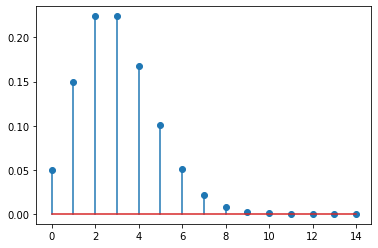

In [ ]:
from scipy.stats import poisson

rate = 3

probs = [poisson.pmf(i, rate) for i in range(15)]
plt.stem(list(range(15)), probs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

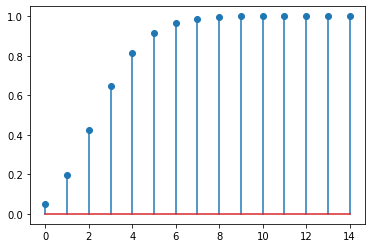

In [ ]:
rate = 3

probs = [poisson.cdf(i, rate) for i in range(15)]
plt.stem(list(range(15)), probs)

Rozkład liczby nieobecności studentów na zajęciach ze statystyki jest rozkładem Poissona z parametrem $\lambda=3$.
Oblicz prawdopobieństwo, że student będzie nieobecny w ciągu semestru:

- dokładnie raz

In [ ]:
scipy.stats.poisson.pmf(1, 3)

0.14936120510359185

- conajwyżej dwa razy

In [ ]:
scipy.stats.poisson.cdf(2, 3)

0.42319008112684364

- więcej niż 5 razy

In [ ]:
1-scipy.stats.poisson.cdf(5, 3)

0.08391794203130343

## Rozkład normalny

Najważniejszy rozkład statystyczny. Największa część obserwacji skupia się wokół średniej, wartości bardziej oddalone od średniej są znacznie rzadziej reprezentowane. Zmienną losową X o rozkładzie normalnym oznaczamy $X \tilde{} N(\mu, \sigma)$, gdzie $\mu$ jest średnią, a $\sigma$ odchyleniem standardowym

Funkcja gęstości prawdopobieństwa (w pythonie: ``scipy.stats.norm.pdf(x, loc, scale)`` gdzie loc = $\mu$, scale=$\sigma$):
$$ f(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$

Dystrybuanta (w pythonie ``scipy.stats.norm.cdf(x, loc, scale)`` gdzie loc = $\mu$, scale=$\sigma$):
$$ F(x) = \int_{-\infty}^{x} \frac{1}{\sigma \sqrt{2 \pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}} dx$$

Obliczanie prawdopobieństwa:
* $P(X=a)=0$
* $P(a \leq x \leq b) = P(a<x<b) = \int_a^b f(x)dx = F(b) - F(a)$
* $P(X<a) = \int_{-\infty}^a f(x)dx = F(a)$
* $P(X>a) = \int_{a}^{\infty}f(x)dx = 1 - F(a)$

Zwizualizowane prawdopobieństwa dla rozkładu $N(0,1)$:

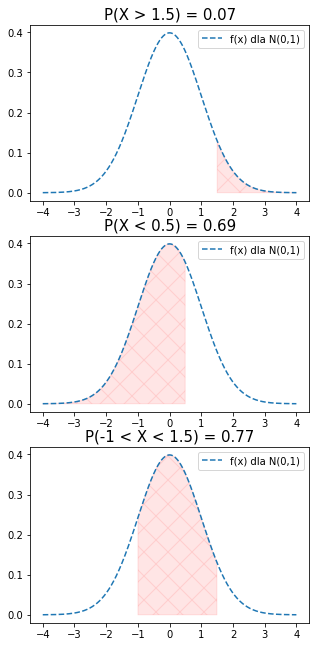

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np 

x = np.linspace(-4, 4 , 1000)
y1 = norm.pdf(x, 0,1)
plt.figure(figsize=(5,11))

plt.subplot(3,1,1)
prawd = 1 - norm.cdf(1.5, 0, 1)
plt.title('P(X > 1.5) = {}'.format(round(prawd,2)), size=15)
plt.plot(x, y1, '--', label='f(x) dla N(0,1)')
plt.fill_between(x, y1, where=(x>1.5), alpha =0.1, color='red', hatch='X')
plt.legend()

plt.subplot(3,1,2)
prawd = norm.cdf(0.5, 0, 1)
plt.title('P(X < 0.5) = {}'.format(round(prawd,2)), size=15)
plt.plot(x, y1, '--', label='f(x) dla N(0,1)')
plt.fill_between(x, y1, where=(x<0.5), alpha =0.1, color='red', hatch='X')
plt.legend()


plt.subplot(3,1,3) 
prawd = norm.cdf(1.5, 0, 1) - norm.cdf(-1, 0, 1)
plt.title('P(-1 < X < 1.5) = {}'.format(round(prawd,2)), size=15)
plt.plot(x, y1, '--', label='f(x) dla N(0,1)')
plt.fill_between(x, y1, where=((x<1.5) & (x>-1)), alpha =0.1, color='red', hatch='X')
plt.legend()

Zmienna losowa X ma rozkład normalny, E(X) = 5 i V(X) = 4.

Obliczyć P(X < 6), P(X > 0), P(2 < X <= 7), P(2 < X < 4), P(6 < X <= 8), P(3 < X < 14). P(X >=5)

<font size=0.5>* zamień wariancję na odchylenie standardowe</font>

In [ ]:
norm.cdf(6, 5, 2)

0.6914624612740131

In [ ]:
norm.cdf(7, 5, 2)-norm.cdf(2, 5, 2)

0.7745375447996848

In [ ]:
norm.cdf(4, 5, 2)-norm.cdf(2, 5, 2)

0.2417303374571288

In [ ]:
norm.cdf(6, 5, 2)-norm.cdf(8, 5, 2)

In [ ]:
norm.cdf(14, 5, 2)-norm.cdf(3, 5, 2)

0.8413413483954182

In [ ]:
1-norm.cdf(5, 5, 2)

0.5

Naszkicuj wykresy gęstości zmiennych losowych X ~ N(2; 3), Y ~ N(4; 3), Z ~ N(2; 1).


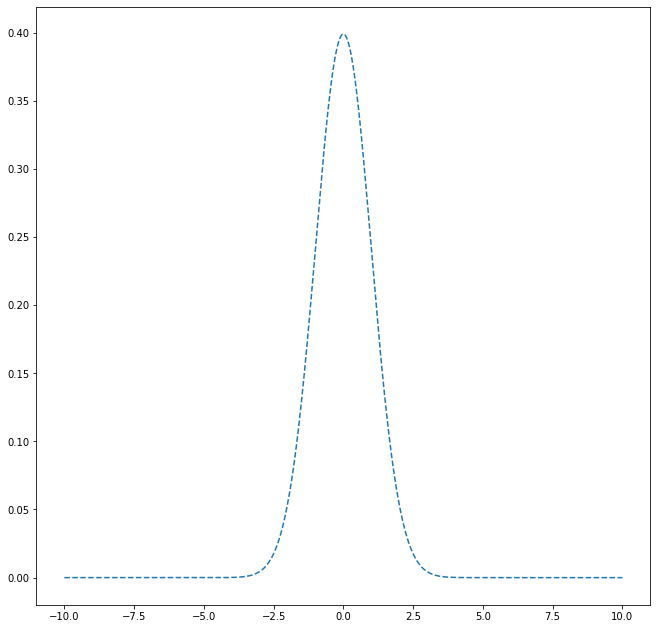

In [ ]:
x = np.linspace(-10, 10 , 1000)
y1 = norm.pdf(x, 0,1)
plt.figure(figsize=(11,11))
plt.plot(x, y1, '--')

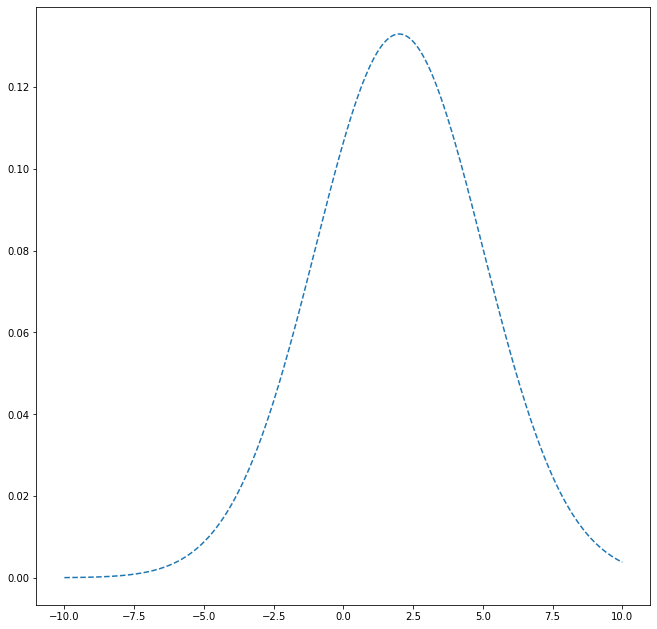

In [ ]:
x = np.linspace(-10, 10 , 1000)
y1 = norm.pdf(x, 2,3)
plt.figure(figsize=(11,11))
plt.plot(x, y1, '--')

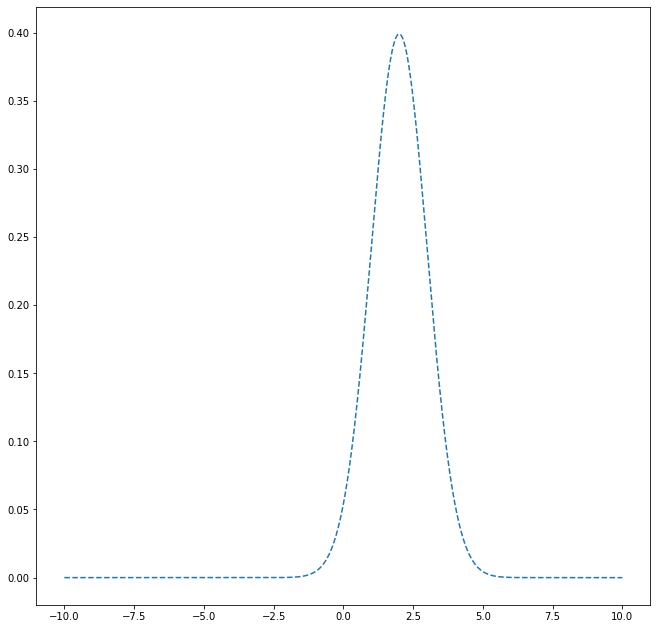

In [ ]:
x = np.linspace(-10, 10 , 1000)
y1 = norm.pdf(x, 2,1)
plt.figure(figsize=(11,11))
plt.plot(x, y1, '--')

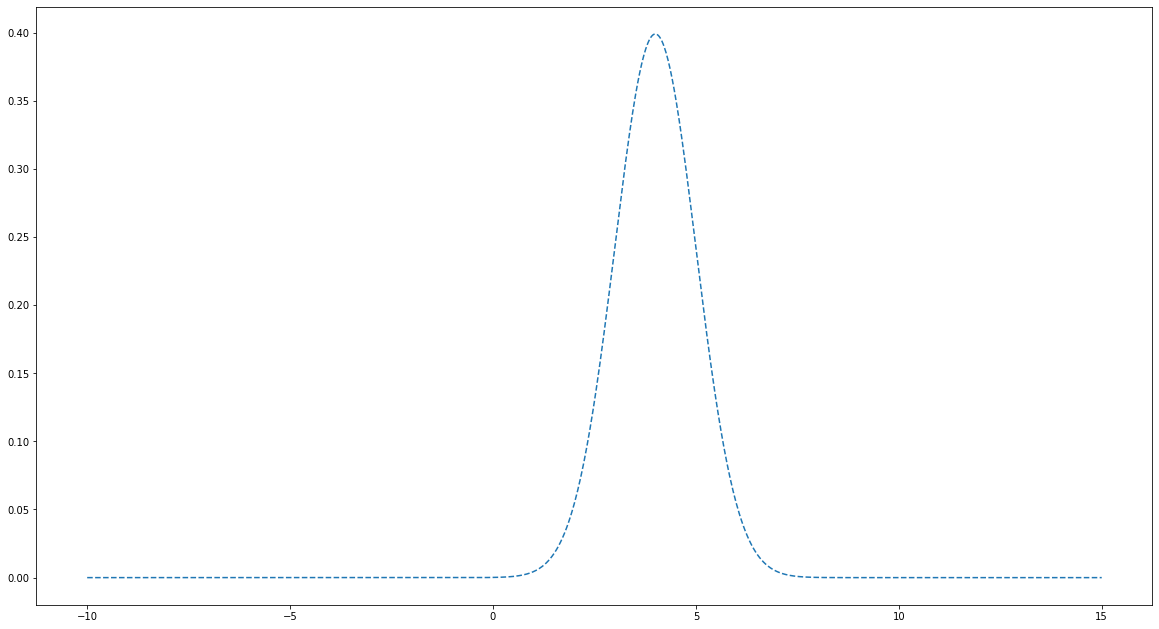

In [ ]:
x = np.linspace(-10, 15 , 1000)
y1 = norm.pdf(x, 4,1)
plt.figure(figsize=(20,11))
plt.plot(x, y1, '--')

## Rozkład log-normalny

Bardzo często spotykany w praktyce rozkład, definiowany jako exponent rozkładu normalnego, lub inaczej - logarytmując ten rozkład uzyskujemy rozkład normalny.

Ważną właśnością  tego rozkładu jest to, że o ile wartości obserwacji możemy przekształcać log-exp, to momenty rozkładu nie zachowują się w tak prosty spobsób tj. średnia E(X) != log(E(Y)). gdzie  $X \tilde{} logN(\mu, \sigma)$, $Y \tilde{} N(\mu, \sigma)$, a raczej:

Wartość oczekiwana:
$E(X) = exp(\mu + \sigma^2 / 2)$

Wariancja:
$V(X) = [exp(\sigma^2)-1)]exp(2 /mu + /sigma^2)$

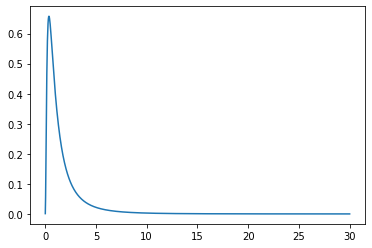

In [ ]:
from scipy.stats import lognorm

x = np.linspace(0.01, 30 , 1000)
y1 = lognorm.pdf(x, 1)
plt.plot(x, y1)

Po zlogarytmowaniu wartości:

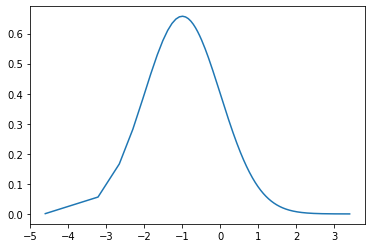

In [ ]:
y1 = lognorm.pdf(x, 1)
plt.plot(np.log(x), y1)

Proszę pokazać, że policzyć średdnią oraz wariancję rozkładu log normalnego, ich logarytmy, oraz średnią i wariancję dla zlogowanych wartości.

11.030282651389468

Następnie proszę sprawdzić czy podane wzory działają na przejścia między parametrami działają.

# Przełożenie na testowanie

W testowaniu statystycznym dokonujemu podobnych operacji jakie ćwiczyliśmy przed chwilą - staramy się ocenić jak prawdopodbne byłoby zaobserwowanie danych, które uzyskaliśmy, zakładając, że hipoteza zerowa jest prawdziwa. 

### Przykład t-test

W klasycznym t-teście testujemy hipotezę, że wartości oczekiwane w dwóch rozkładach normalnych, o tej samej wariancji, są równe.

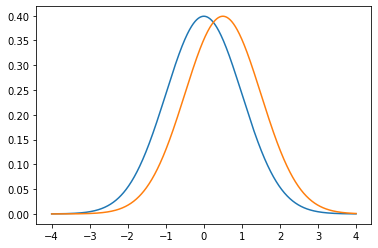

In [ ]:
x = np.linspace(-4, 4 , 1000)
y1 = norm.pdf(x, 0, 1)
y2 = norm.pdf(x, 0.5, 1)
plt.plot(x, y1)
plt.plot(x, y2)

Chcemy, więc ocenić, jak jest sznasa, że różnica średnich $\bar{X_1}$ - $\bar{X_2} = 0$ . Aby to zrobić musimy wiedzieć z jakiego rozkłądu pochodzi różnica warotści oczekiwanych z 2 rozkładów normalnych. Na szczęście zostało to dla nas wyprowadzone - po pewnych przekształceniach będzie to rozkład t-Studenta.

$t = \frac{\bar{X_1} - \bar{X_2}}{s_p \sqrt{2/n}}$ - taką miarę nazwywamy statystyką

$ t \tilde{} Student(2n-2)$

Wylosujmy dane dla podanych paramametrów rozkłądów i spróbujmy to policzyć (po 100 obserwacji).

Losowanie - norm.rvs(loc=3, scale=5, size=100)

Rozkład t-Studenta - scipy.stats.t 

Na początek proszę wylosować dane i policzyć wartość statystyki do testu

In [ ]:
from scipy.stats import t